<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%93%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание Pro**

1. Сделайте самостоятельно довольно мощную свёрточную сеть для Cifar10.

2. Добейтесь, чтобы ГА сделал точность на проверочной заметно выше, чем у вашей сети.

3. Для скорости можно использовать для обучения первые 1000 картинок и для проверки следующие 200 картинок.

Подсказка: в стартовую популяцию можно добавить вашу сеть или около 10 вариаций с небольшими отклонениями от неё, но лучше не всю популяцию делать вариациями от неё, чтобы у ГА была вариативность.

In [ ]:
# загружаем библиотеки
import time
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, concatenate, Dropout, Input, Activation, Reshape
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

In [ ]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

In [ ]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

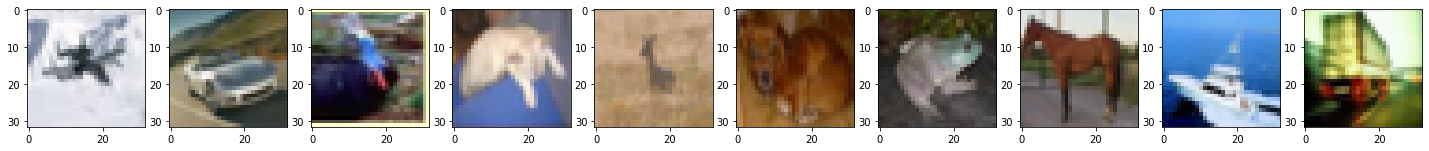

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
  label_indexes = np.where(y_train10==i)[0]
  index = random.choice(label_indexes)
  img = x_train10[index]
  axs[i].imshow(Image.fromarray(img))

plt.show()

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)
# Посмотрим размеры выборок перед обучением
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


Epoch 1/20
196/196 [==============================] - 9s 29ms/step - loss: 1.5304 - accuracy: 0.4420 - val_loss: 3.0922 - val_accuracy: 0.1510
Epoch 2/20
196/196 [==============================] - 5s 25ms/step - loss: 1.0472 - accuracy: 0.6260 - val_loss: 1.3568 - val_accuracy: 0.5225
Epoch 3/20
196/196 [==============================] - 5s 25ms/step - loss: 0.8534 - accuracy: 0.6967 - val_loss: 0.8205 - val_accuracy: 0.7147
Epoch 4/20
196/196 [==============================] - 5s 25ms/step - loss: 0.7386 - accuracy: 0.7398 - val_loss: 0.8312 - val_accuracy: 0.7130
Epoch 5/20
196/196 [==============================] - 5s 25ms/step - loss: 0.6622 - accuracy: 0.7672 - val_loss: 0.6534 - val_accuracy: 0.7699
Epoch 6/20
196/196 [==============================] - 5s 25ms/step - loss: 0.6029 - accuracy: 0.7866 - val_loss: 0.6147 - val_accuracy: 0.7899
Epoch 7/20
196/196 [==============================] - 5s 25ms/step - loss: 0.5492 - accuracy: 0.8061 - val_loss: 0.6060 - val_accuracy: 0.7974

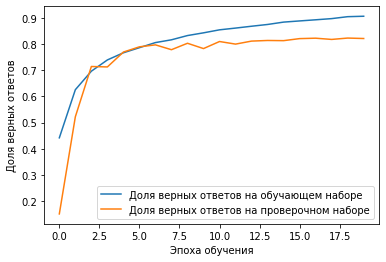

In [ ]:
# Нейронная сеть

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.2))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.2))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.2))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

#Обучаем сеть
history = model.fit(x_train10, y_train10, batch_size=256, epochs=20,
                    validation_data=(x_test10, y_test10))

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
#Создаём сеть (net - список параметров)
def createConvNet(net):

    makeNormalization0 = net[0]     # Делаем ли нормализацию в начале
    ConvSize0 = 2 ** net[1]         # Размер первого cвёрточного слоя
        
    makeNormalization1 = net[2]     # Делаем ли нормализацию
    makeConv1 = net[3]              # Делаем ли сверточный слой
    ConvSize1 = 2 ** net[4]         # Размер cвёрточного слоя
        
    makeNormalization2 = net[5]     # Делаем ли нормализацию
    makeConv2 = net[6]              # Делаем ли сверточный слой
    ConvSize2 = 2 ** net[7]         # Размер cвёрточного слоя
        
    makeNormalization3 = net[8]     # Делаем ли нормализацию
    makeConv3 = net[9]              # Делаем ли сверточный слой
    ConvSize3 = 2 ** net[10]        # Размер cвёрточного слоя
        
    makeNormalization4 = net[11]    # Делаем ли нормализацию
    makeConv4 = net[12]             # Делаем ли сверточный слой
    ConvSize4 = 2 ** net[13]        # Размер cвёрточного слоя
        
    DenseSize0 = 2 ** net[14]       # Размер полносвязного слоя
    activation0 = net[15]           # Функция активации полносвязного слоя
    makeDense1 = net[16]            # Добавляем ли еще полносвязный слой
    DenseSize1 = 2 ** net[17]       # Размер полносвязного слоя
    activation1 = net[18]           # Функция активации полносвязного слоя

    shape = (32, 32, 3)             # Размер входных данных
    inputs = Input(shape)           # Входной слой


    # Список активационных функций
    activation_list = ['linear','relu','tanh','softmax','sigmoid']

    # Если делаем нормализацию в начале
    if makeNormalization0:
        x = BatchNormalization()(inputs)
        x = Conv2D(ConvSize0, 3, padding='same', activation='relu')(x)
        x = Conv2D(ConvSize0, 3, padding='same', activation='relu')(x)
        x = MaxPooling2D(2)(x)
        x = Dropout(0.3)(x)
            
    # Если начальную нормализацию не делаем
    else:
        # Добавляем Conv2D-слой
        x = Conv2D(ConvSize0, 3,input_shape=(32, 32, 3), padding='same', activation='relu')(inputs)
        x = Conv2D(ConvSize0, 3, padding='same', activation='relu')(x)
        x = MaxPooling2D(2)(x)
        x = Dropout(0.3)(x)

    for i in range(3):
        # Проходимся по каждому блоку и добавляем слои, которые нужны
        if net[2 + i * 3] != 0:
            x = BatchNormalization()(x)
        if net[3 + i * 3] != 0:
            x = Conv2D(2**net[4 + i * 3], 3, padding='same', activation='relu')(x)
            x = Conv2D(2**net[4 + i * 3], 3, padding='same', activation='relu')(x)
            x = MaxPooling2D(2)(x)
            x = Dropout(0.3)(x)
    
    if makeNormalization4:
        x = BatchNormalization()(x)
    if makeConv4:
        x = Conv2D(ConvSize4, 3, padding='same', activation='relu')(x)
        x = Dropout(0.3)(x)
    fin = Flatten()(x)
    
    # Добавление полносвязного слоя
    fin = Dense(DenseSize0, activation=activation_list[activation0])(fin)

    # добавление дополнительного полносвязного слоя
    if makeDense1:
        fin = Dense(DenseSize1, activation=activation_list[activation1])(fin)

    # Добавление выходного слоя
    fin = Dense(10, activation='softmax')(fin)

    model = Model(inputs, fin)
    return model



'''
  Функция вычисления результата работы сети
'''

def evaluateNet(net, ep, verb):
    val = 0
    # Создаем модель createConvNet
    model = createConvNet(net)

    # засекаем время на обучение одной эпохи
    curr_time = time.time()

    # Компилируем модель
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    #Обучаем сеть
    history = model.fit(x_train10, y_train10, batch_size=256, epochs=1,
                        validation_data=(x_test10, y_test10), verbose=verb)
    
    # если обучается слишком долго, прерываем обучение
    epoch_time = int(time.time() - curr_time)

    if epoch_time > 40:
        val = 0
    else:
        # Компилируем модель
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

        #Обучаем сеть
        history = model.fit(x_train10, y_train10, batch_size=256, epochs=5,
                            validation_data=(x_test10, y_test10), verbose=verb)
        
        # Возвращаем точность на проверочной выборке с последней эпохи
        val = history.history["val_accuracy"][-1]

    # Возвращаем точность
    return val, model


'''
  Функция создания списка случайных параметров
'''
def createRandomNet():
    net = []
    net.append(random.randint(0,1))   # Делаем или нет нормализацию
    net.append(random.randint(5,10))  # Первый свёрточный слой от 32 до 1024 нейронов
    
    net.append(random.randint(0,1))   # Делаем или нет нормализацию
    net.append(random.randint(0,1))   # Делаем ли сверточный слой
    net.append(random.randint(5,10))  # Размер свёрточного слоя от 32 до 1024 нейронов
    
    net.append(random.randint(0,1))   # Делаем или нет нормализацию
    net.append(random.randint(0,1))   # Делаем ли сверточный слой
    net.append(random.randint(5,10))  # Размер свёрточного слоя от 32 до 1024 нейронов
    
    net.append(random.randint(0,1))   # Делаем или нет нормализацию
    net.append(random.randint(0,1))   # Делаем ли сверточный слой
    net.append(random.randint(5,10))  # Размер свёрточного слоя от 32 до 1024 нейронов
    
    net.append(random.randint(0,1))   # Делаем или нет нормализацию
    net.append(random.randint(0,1))   # Делаем ли сверточный слой
    net.append(random.randint(5,10))  # Размер свёрточного слоя от 32 до 1024 нейронов
    
    net.append(random.randint(5, 10)) # Размер полносвязного слоя от 32 до 1024 нейронов
    net.append(random.randint(0,4))   # Функция активации полносвязного слоя
    net.append(random.randint(0,1))   # Добавляем ли еще полносвязный слой
    net.append(random.randint(5, 10)) # Размер полносвязного слоя от 32 до 1024 нейронов
    net.append(random.randint(0,4))   # Функция активации полносвязного слоя

    return net

In [ ]:
# число ботов
n = 20
# Размер бота
l = 19
# количество эпох
epohs = 5
# коэфициент мутаций
mut = 0.3

# Создадим стартовую популяцию, куда включим настройки первоначальной сети
start_popul=[[1,5,1,1,6,1,1,7,0,0,5,0,0,5,9,1,0,5,1],
             [1,10,1,1,9,1,1,8,1,1,7,1,1,6,9,1,1,9,1],
             [1,6,1,1,7,1,1,8,1,1,9,1,1,10,9,1,1,5,1],
             [0,5,1,0,8,0,1,6,1,0,6,1,0,10,7,4,0,7,2],
             [1,5,1,1,6,1,1,7,1,1,8,1,1,9,8,1,1,5,1]]

#Добавляем случайных ботов
for i in range(n-len(start_popul)):
    start_popul.append(createRandomNet())
popul=start_popul

for it in range(epohs):
    # Обнуляем значения бота
    val = []
    # Пробегаем в цикле по всем ботам
    for i in range(n):
        # Берем очередного бота
        bot = popul[i]

        # Вычисляем точность текущего бота
        # если получаем ошибку, пропускаем бота
        try:
            f,model_sum = evaluateNet(bot, 5, 1)
            val.append(f)
        except:
            pass
        
    # Сортируем val
    sval = sorted(val, reverse=1)
    # Выводим результаты 5 лучших ботов
    print(it, " ", sval[0:5],popul[:5])

    # Не все боты пройдут, поэтому если количество выживших будет меньше 10 возьмем всех
    if len(sval) >= 10:
        # Количество выживших
        nsurv = 10
    else:
        nsurv = len(sval)
    # Количество новых ботов
    nnew = n - nsurv

    # Создаем пустой список под новую популяцию
    newpopul = []
    # Пробегаем по всем выжившим ботам
    for i in range(nsurv):
        # Получаем индекс очередного бота из списка лучших в списке val
        index = val.index(sval[i])
        # Добавляем в новую популяцию бота из popul с индексом index
        newpopul.append(popul[index])
    
    # Проходимся в цикле nnew-раз
    for i in range(nnew):
        # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
        indexp1 = random.randint(0,nsurv-1)
        # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1
        indexp2 = random.randint(0,nsurv-1)
        # Получаем первого бота-родителя по indexp1
        botp1 = newpopul[indexp1]
        # Получаем второго бота-родителя по indexp2
        botp2 = newpopul[indexp2]
        # Создаем пустой список под значения нового бота
        newbot = []
        # Создаем случайную сеть для мутаций
        net4Mut = createRandomNet()
        # Пробегаем по всей длине размерности (28)
        for j in range(l):
            x = 0
            # Получаем случайное число в диапазоне от 0 до 1
            pindex = random.random()
            # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
            if pindex < 0.5:
                x = botp1[j]
            else:
                x = botp2[j]
            
            # С вероятностью mut устанавливаем значение бота из net4Mut
            if (random.random() < mut):
                x = net4Mut[j]
            # Добавляем очередное значение в нового бота
            newbot.append(x)
        # Добавляем бота в новую популяцию
        newpopul.append(newbot)
    # Записываем в popul новую посчитанную популяцию
    popul = newpopul

196/196 [==============================] - 6s 26ms/step - loss: 1.6582 - accuracy: 0.3915 - val_loss: 3.3258 - val_accuracy: 0.1068
Epoch 1/5
196/196 [==============================] - 6s 25ms/step - loss: 1.2118 - accuracy: 0.5598 - val_loss: 2.3926 - val_accuracy: 0.2982
Epoch 2/5
196/196 [==============================] - 5s 24ms/step - loss: 1.0249 - accuracy: 0.6307 - val_loss: 1.0399 - val_accuracy: 0.6275
Epoch 3/5
196/196 [==============================] - 5s 24ms/step - loss: 0.9029 - accuracy: 0.6771 - val_loss: 0.8625 - val_accuracy: 0.6989
Epoch 4/5
196/196 [==============================] - 5s 24ms/step - loss: 0.8191 - accuracy: 0.7076 - val_loss: 0.7857 - val_accuracy: 0.7202
Epoch 5/5
196/196 [==============================] - 23s 89ms/step - loss: 1.9091 - accuracy: 0.2922 - val_loss: 5.3623 - val_accuracy: 0.1195
Epoch 1/5
196/196 [==============================] - 17s 80ms/step - loss: 1.3827 - accuracy: 0.4874 - val_loss: 1.5874 - val_accuracy: 0.5186
Epoch 2/5
196/

In [ ]:
# смотрим структуру самого лучшего бота
model = createConvNet(popul[0])
model.summary()

Model: "model_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_164 (InputLayer)       [(None, 32, 32, 3)]       0         
_________________________________________________________________
batch_normalization_470 (Bat (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_994 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_995 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_451 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_544 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_996 (Conv2D)          (None, 16, 16, 256)       14

Epoch 1/20
391/391 [==============================] - 43s 95ms/step - loss: 1.4200 - accuracy: 0.4782 - val_loss: 1.1933 - val_accuracy: 0.6012
Epoch 2/20
391/391 [==============================] - 37s 94ms/step - loss: 0.9527 - accuracy: 0.6655 - val_loss: 1.0565 - val_accuracy: 0.6665
Epoch 3/20
391/391 [==============================] - 37s 95ms/step - loss: 0.7486 - accuracy: 0.7416 - val_loss: 0.7149 - val_accuracy: 0.7671
Epoch 4/20
391/391 [==============================] - 37s 95ms/step - loss: 0.6250 - accuracy: 0.7851 - val_loss: 0.5935 - val_accuracy: 0.8004
Epoch 5/20
391/391 [==============================] - 37s 95ms/step - loss: 0.5449 - accuracy: 0.8145 - val_loss: 0.6787 - val_accuracy: 0.7798
Epoch 6/20
391/391 [==============================] - 37s 95ms/step - loss: 0.4686 - accuracy: 0.8419 - val_loss: 0.5520 - val_accuracy: 0.8167
Epoch 7/20
391/391 [==============================] - 37s 95ms/step - loss: 0.4105 - accuracy: 0.8603 - val_loss: 0.6073 - val_accuracy:

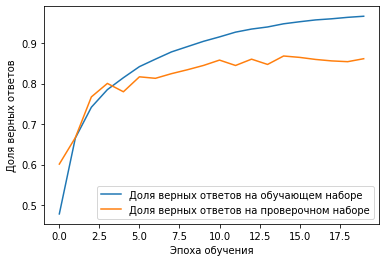

In [ ]:
#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

#Обучаем сеть
history = model.fit(x_train10, y_train10, batch_size=128, epochs=20,
                    validation_data=(x_test10, y_test10))

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Вывод: после применения генетических алгоритмов к нейронной сети, точность увеличилась с 82 до 86%.